# 1.Tải bộ dữ liệu:

In [1]:
! gdown https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4

Downloading...
From (original): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4
From (redirected): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4&confirm=t&uuid=74c36248-95d9-4faf-9ac3-eab9387be3ca
To: /content/creditcard.csv
100% 151M/151M [00:02<00:00, 62.9MB/s]


# 2.Import libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 3.Read data set:

In [3]:
dataset_path = "creditcard.csv"
df = pd.read_csv(dataset_path, index_col = 0)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, 0.0 to 172792.0
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     284

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 4.Divide dataset to X, y:

In [4]:
dataset_arr = df.to_numpy()

X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


# 5.Add bias to X feature matrix:

In [5]:
intercept = np.ones((X.shape[0],1))
X_b = np.concatenate((intercept,X),axis=1)

print(X_b.shape)
print(X_b)

(284807, 30)
[[ 1.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 1.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.00000000e+00  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.00000000e+00 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.00000000e+00 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]


# 6.One-hot encoding

In [9]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.zeros((n_samples, n_classes))
y_encoded[np.arange(n_samples), y] = 1

print(n_classes)
print(n_samples)
print(y_encoded[:5])


2
284807
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# 7.Divide dataset to sub-datasets: train, val, test

In [28]:
#train, val, test: 7:2:1
val_size = 0.2
test_size = 0.125

random_state = 2
isshuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=isshuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.125, random_state=random_state, shuffle=isshuffle)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(199364, 30)
(56962, 30)
(28481, 30)


# 8.Data standardization:

In [29]:
normalizer = StandardScaler()

X_train[:,1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])

print(X_train)

[[ 1.          0.71447649 -0.5554154  ...  0.1019486   0.07410031
  -0.29192049]
 [ 1.          1.0475128   0.09064956 ... -0.19095883 -0.09813199
  -0.27780616]
 [ 1.         -1.20352757 -2.0271961  ...  0.31391593  1.12488897
  -0.34496952]
 ...
 [ 1.         -0.46532359  0.21261173 ...  0.05909871  0.15346218
   0.26375106]
 [ 1.         -1.03971015 -0.11434487 ...  0.46421784 -0.36325231
  -0.32624398]
 [ 1.         -0.20953065  0.53688436 ...  0.07337838  0.39953201
  -0.24272082]]


# 9.Install some important functions:

In [30]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z / exp_z.sum(axis=1)[:, None]

In [31]:
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

In [34]:
def compute_loss(y_hat, y):
    n = y.size
    #print(y_hat.shape)
    #print(y.shape)
    return -1/n*np.sum(y*np.log(y_hat))

In [15]:
def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat - y))/n

In [16]:
def update_theta(theta, gradient, lr):
    new_theta = theta - lr*gradient
    return new_theta

In [17]:
def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    accuracy = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

    return accuracy

# 10.Declare hyper-parameters and initialize weights:

In [32]:
lr = 0.01
epochs = 30
batchsize = 1024
n_features = X_train.shape[1]

np.random.seed(random_state) #this function will make the random consistent, easier to debug
theta = np.random.uniform(size=(n_features, n_classes))

print(theta.shape)
print(theta[:5])

(30, 2)
[[0.4359949  0.02592623]
 [0.54966248 0.43532239]
 [0.4203678  0.33033482]
 [0.20464863 0.61927097]
 [0.29965467 0.26682728]]


# 11.Train the model

In [35]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_accs = []
    train_batch_losses = []
    val_batch_accs = []
    val_batch_losses = []

    for i in range(0, X_train.shape[0], batchsize):
        X_batch = X_train[i:i+batchsize]
        y_batch = y_train[i:i+batchsize]
        #print(y_batch[:5])

        y_hat = predict(X_batch, theta)
        #print(y_hat[:5])
        batch_loss = compute_loss(y_hat, y_batch)
        train_batch_losses.append(batch_loss)

        batch_gradient = compute_gradient(X_batch, y_batch, y_hat)
        theta = update_theta(theta, batch_gradient, lr)

        train_accuracy = compute_accuracy(X_train, y_train, theta) #accuracy after update theta
        train_batch_accs.append(train_accuracy)

        #evaluate on valdaition dataset
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_accuracy = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_accuracy)

    train_batch_acc = np.mean(train_batch_accs)
    train_batch_loss = np.mean(train_batch_losses)
    val_batch_acc = np.mean(val_batch_accs)
    val_batch_loss = np.mean(val_batch_losses)

    train_accs.append(train_batch_acc)
    train_losses.append(train_batch_loss)
    val_accs.append(val_batch_acc)
    val_losses.append(val_batch_loss)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')
    print(f'\t\tTraining acc: {train_batch_acc:.3f}\tValidation acc: {val_batch_acc:.3f}')


EPOCH 1:	Training loss: 0.183	Validation loss: 0.182
		Training acc: 0.892	Validation acc: 0.889

EPOCH 2:	Training loss: 0.116	Validation loss: 0.115
		Training acc: 0.973	Validation acc: 0.973

EPOCH 3:	Training loss: 0.081	Validation loss: 0.080
		Training acc: 0.992	Validation acc: 0.992

EPOCH 4:	Training loss: 0.061	Validation loss: 0.061
		Training acc: 0.996	Validation acc: 0.996

EPOCH 5:	Training loss: 0.049	Validation loss: 0.049
		Training acc: 0.997	Validation acc: 0.998

EPOCH 6:	Training loss: 0.041	Validation loss: 0.041
		Training acc: 0.998	Validation acc: 0.998

EPOCH 7:	Training loss: 0.036	Validation loss: 0.035
		Training acc: 0.998	Validation acc: 0.999

EPOCH 8:	Training loss: 0.031	Validation loss: 0.031
		Training acc: 0.999	Validation acc: 0.999

EPOCH 9:	Training loss: 0.028	Validation loss: 0.028
		Training acc: 0.999	Validation acc: 0.999

EPOCH 10:	Training loss: 0.025	Validation loss: 0.025
		Training acc: 0.999	Validation acc: 0.999

EPOCH 11:	Training

# 12.Data visualization

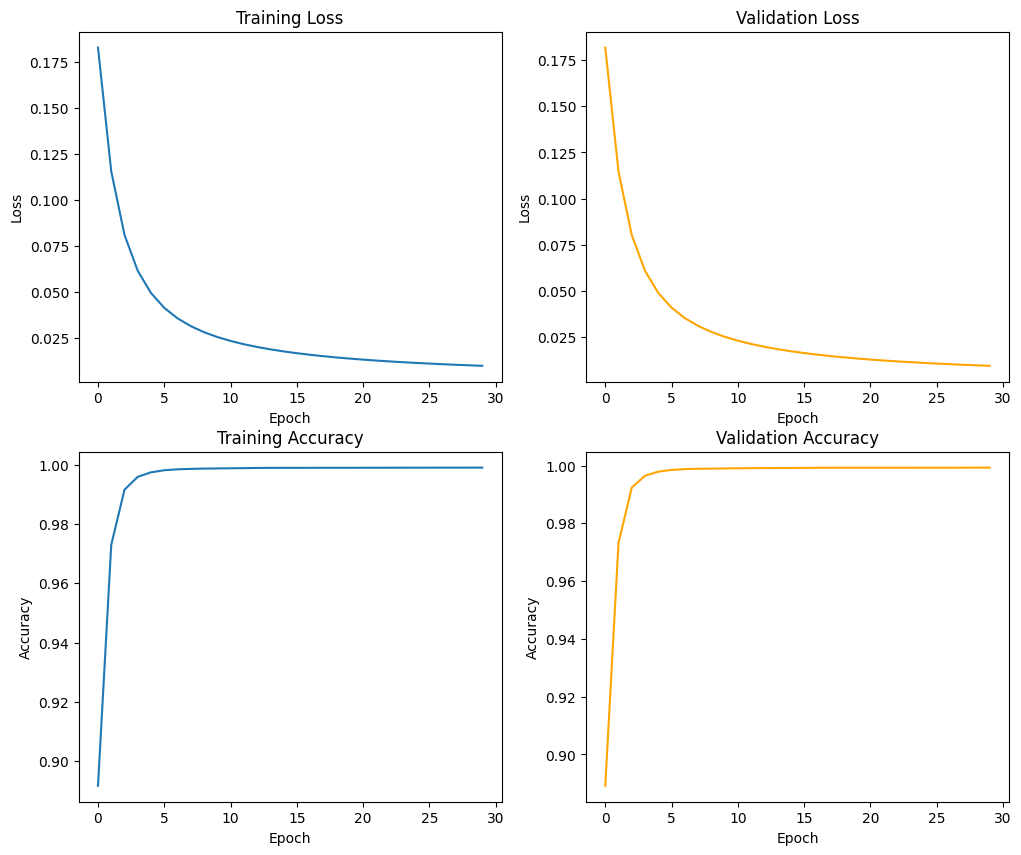

In [36]:
fig, ax = plt.subplots(2, 2, figsize = (12,10))

ax[0,0].plot(train_losses)
ax[0,0].set(xlabel='Epoch', ylabel='Loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_losses, 'orange')
ax[0,1].set(xlabel='Epoch', ylabel='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_accs, 'orange')
ax[1,1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

# 13.Evaluate model

In [37]:
val_set_acc = compute_accuracy(X_val , y_val , theta )
test_set_acc = compute_accuracy(X_test , y_test , theta )

print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.9992802219023208
Accuracy: 0.9992275552122467
